From Christopher Dierkes, a lazy day puzzle:

You and I find ourselves indoors one rainy afternoon, with nothing but some loose change in the couch cushions to entertain us. We decide that we’ll take turns flipping a coin, and that the winner will be whoever flips 10 heads first. The winner gets to keep all the change in the couch! Predictably, an enormous argument erupts: We both want to be the one to go first.

What is the first flipper’s advantage? In other words, what percentage of the time does the first flipper win this game?

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def coin(p=0.5):
    temp = (np.random.rand(1) < 0.5).astype(int)
    return temp

# Demonstrate the coin function is not biased

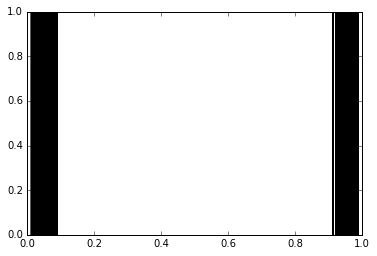

In [43]:
temp=[]
for ii in range(100):
    temp.append(coin())
_=plt.hist(temp)

# Let's start the game

In [81]:
winning=[]
doTime = 500
simTime = 500
for kk in range(doTime):
    result = [];simulate_outcomes=[]
    for jj in range(simTime):
        for ii in range(int(1e9)):
            result.append([coin(),coin()])
            if (np.array(result)[:,0].sum() >=10):
                simulate_outcomes.append('A')
                break
            elif (np.array(result)[:,1].sum()>=10):
                simulate_outcomes.append('B')
                break
    simulate_outcomes = np.array(simulate_outcomes)
    win_A = len(np.where(simulate_outcomes == 'A')[0])/simTime
    win_B = len(np.where(simulate_outcomes == 'B')[0])/simTime
    winning.append([win_A,win_B])

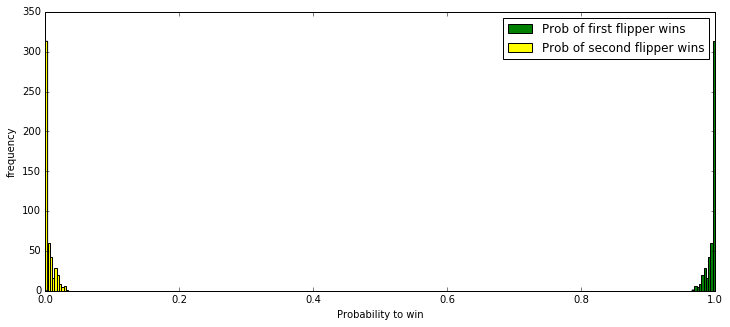

In [91]:
winning = np.array(winning)
fig, ax = plt.subplots(figsize=(12,5))
_=ax.hist(winning[:,0],color='green',label='Prob of first flipper wins')
_=ax.hist(winning[:,1],color='yellow',label='Prob of second flipper wins')
_=ax.set(xlabel='Probability to win',ylabel='frequency')
ax.legend(loc='best')

In [93]:
print('Highest probability that the second flipper wins is %.4f'% winning[:,1].max())
print('Lowest probability that the first flipper wins is %.4f'% winning[:,0].min())

Highest probability that the second flipper wins is 0.0340
Lowest probability that the first flipper wins is 0.9660
